## Naive Bayes Classifier

- Naive Bayes is a statistical classification technique based on Bayes Theorem. 
- It is one of the simplest supervised learning algorithms. 
- Naive Bayes classifier is the fast, accurate and reliable algorithm. 
- Naive Bayes classifiers have high accuracy and speed on large datasets.
- Naive Bayes classifier is successfully used in various applications such as spam filtering, text classification, sentiment analysis, and recommender systems.
- It uses Bayes theorem of probability for prediction of unknown class.

Naive Bayes classifier assumes that the effect of a particular feature in a class is independent of other features.

The algorithm relies on the posterior probability of the class given a predictor, as shown in the following formula:
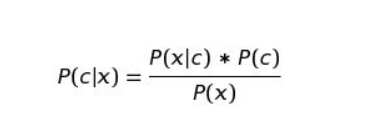
where,
- P(c|x) - the posterior probability of class given a predictor
- P(x|c) - the probability of the predictor given the class. Also known as Likelihood
- P(c) - the prior probability of the class
- P(x) - the prior probability of predictor.

###  Gaussian Naive Bayes
This type of Naive Bayes is used when variables are continuous in nature. It assumes that all the variables have a normal distribution. So if you have some variables which do not have this property, you might want to transform them to the features having distribution normal.
- **GaussianNB** implements the Gaussian Naive Bayes algorithm for classification. 
- The likelihood of the features is assumed to be Gaussian:
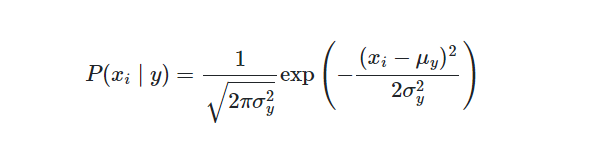
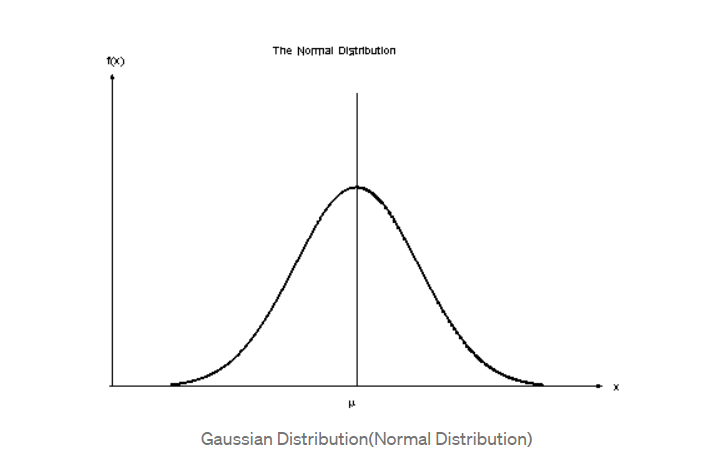


### Multinomial Naive Bayes
This is used when the features represent the frequency.This is mostly used for document classification problem, i.e whether a document belongs to the category of sports, politics, technology etc. The features/predictors used by the classifier are the frequency of the words present in the document.
- It is known to work well with text classification problems.

### Bernoulli Naive 
This is similar to the multinomial naive bayes but the predictors are boolean variables. The parameters that we use to predict the class variable take up only values yes or no, for example if a word occurs in the text or not.
This is used when features are binary. So, instead of using the frequency of the word, if you have discrete features in 1s and 0s that represent the presence or absence of a feature.

##### Advantages :

- It is easy and fast to predict class of test data set. It also perform well in multi class prediction
- When assumption of independence holds, a Naive Bayes classifier performs better compare to other models like logistic regression and you need less training data.
- It perform well in case of categorical input variables compared to numerical variable(s). For numerical variable, normal distribution is assumed (bell curve, which is a strong assumption).
- It performs well in case of discrete response variable compared to the continuous variable.

##### Disadvantages :
- If categorical variable has a category (in test data set), which was not observed in training data set, then model will assign a 0 (zero) probability and will be unable to make a prediction. This is often known as “Zero Frequency”. To solve this, we can use the smoothing technique. One of the simplest smoothing techniques is called Laplace estimation.
- On the other side naive Bayes is also known as a bad estimator, so the probability outputs from predict_proba are not to be taken too seriously.
- Another limitation of Naive Bayes is the assumption of independent predictors. In real life, it is almost impossible that we get a set of predictors which are completely independent.

#### Applications :
- **Real time Prediction:** Naive Bayes is an eager learning classifier and it is sure fast. Thus, it could be used for making predictions in real time.
- **Multi class Prediction:** This algorithm is also well known for multi class prediction feature. Here we can predict the probability of multiple classes of target variable.
- **Text classification/ Spam Filtering/ Sentiment Analysis:** Naive Bayes classifiers mostly used in text classification (due to better result in multi class problems and independence rule) have higher success rate as compared to other algorithms. As a result, it is widely used in Spam filtering (identify spam e-mail) and Sentiment Analysis (in social media analysis, to identify positive and negative customer sentiments)
- **Recommendation System:** Naive Bayes Classifier and Collaborative Filtering together builds a Recommendation System that uses machine learning and data mining techniques to filter unseen information and predict whether a user would like a given resource or not

### Implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
from sklearn.datasets import make_classification

In [8]:
X, Y = make_classification(n_samples=300, n_features=2,n_informative=2,n_redundant=0)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression

In [10]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.25)

In [11]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [12]:
gnb.fit(xtrain,ytrain)

GaussianNB()

In [13]:
log_reg = LogisticRegression()

In [14]:
log_reg.fit(xtrain,ytrain)

LogisticRegression()

In [15]:
y_gnb_scr = gnb.predict_proba(xtest)
y_lg_scr = log_reg.decision_function(xtest)

In [17]:
from sklearn.metrics import roc_curve

In [19]:
fpr_gnb,tpr_gnb,thrhld_gnb = roc_curve(ytest,y_gnb_scr[:,1])
fpr_lg,tpr_lg,thrhld_lg = roc_curve(ytest,y_lg_scr)

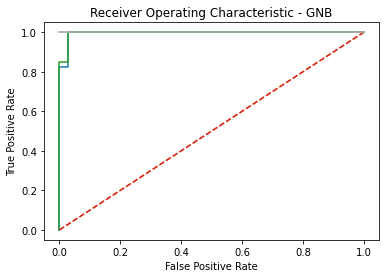

In [27]:
plt.figure()
plt.title('Receiver Operating Characteristic - GNB')
plt.plot(fpr_gnb, tpr_gnb)
plt.plot([0, 1], ls="--")
#plt.plot([0, 0], [1, 0] , c=".7"), 
plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.plot(fpr_lg, tpr_lg)
plt.plot([0, 1], ls="--")
#plt.plot([0, 0], [1, 0] , c=".7"), 
plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


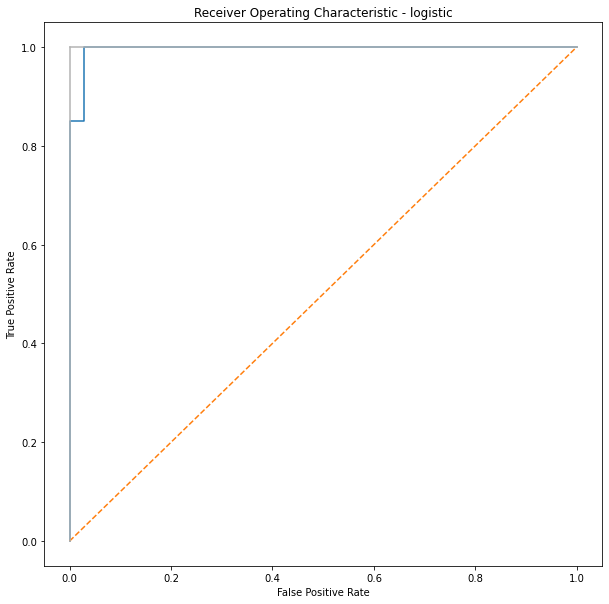

In [25]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - logistic')
plt.plot(fpr_lg, tpr_lg)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), 
plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Example 2

In [28]:
from sklearn import datasets

In [29]:
wine = datasets.load_wine()

In [30]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [32]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [33]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [34]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [35]:
wine.data.shape

(178, 13)

In [36]:
x_train,x_test,y_train,y_test = train_test_split(wine.data,wine.target, test_size=0.30,random_state=40)

In [37]:
gnBayes = GaussianNB()
gnBayes.fit(x_train,y_train)

GaussianNB()

In [38]:
y_pred = gnBayes.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(y_test,y_pred)

1.0